In [ ]:
%pip install pandas
%pip install numpy
%pip install sqlite3
%pip install plotly
%pip install ipython-sql
%pip install matplotlib
%pip install seaborn

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
!wsl --exec wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")

In [ ]:
%reload_ext sql
%sql sqlite:///m4_survey_data.sqlite

In [ ]:
%sql SELECT COUNT(*) FROM master

In [ ]:
%sql SELECT name as Table_Name FROM sqlite_master WHERE type = 'table'

In [ ]:
%sql SELECT Age,COUNT(*) as count FROM master group by age order by age

In [ ]:
%sql SELECT * from master LIMIT 5

In [ ]:
%sql SELECT sql FROM sqlite_master WHERE name= 'master'

In [ ]:
data = pd.read_sql_query("SELECT * FROM master", conn)

In [ ]:
data.head()

In [ ]:
for column, number_of_missing_values in data.isna().sum().items():
    if number_of_missing_values > 0:
        print(f"Column {column} has {number_of_missing_values} missing values")

In [ ]:
data.Age.replace(np.nan, data.Age.mean(), inplace=True)

In [ ]:
data.ConvertedComp.hist()

In [ ]:
data.Age.plot(kind = 'box')

In [ ]:
data.plot(kind = 'scatter', x = 'Age', y = 'WorkWeekHrs')

In [ ]:
px.scatter(data, x = 'WorkWeekHrs', y = 'CodeRevHrs', size='Age')

In [ ]:
databases_next_year = pd.read_sql_query(\
    "SELECT DatabaseDesireNextYear, COUNT(*) AS count \
        FROM DatabaseDesireNextYear \
            GROUP BY DatabaseDesireNextYear \
                ORDER BY COUNT(*) DESC LIMIT 5", conn)

databases_next_year.set_index("DatabaseDesireNextYear", inplace=True)

In [ ]:
databases_next_year.head()

In [ ]:
ax = databases_next_year.plot(kind = 'pie', autopct='%1.1f%%', y = 'count')
ax.legend(bbox_to_anchor=(1, 1.02), loc = 'best')

In [ ]:
language_next_year = pd.read_sql_query(\
    "SELECT LanguageDesireNextYear, COUNT(*) AS count \
        FROM LanguageDesireNextYear \
            GROUP BY LanguageDesireNextYear \
                ORDER BY COUNT(*) DESC LIMIT 5", conn)

language_next_year.set_index("LanguageDesireNextYear", inplace=True)
language_next_year.head()

In [ ]:
data.plot(kind = 'stack')

In [ ]:
median_hrs_for_age_group_30_35 = data[['Age', 'WorkWeekHrs', 'CodeRevHrs']].groupby(["Age"]).agg(['median'])

In [ ]:
median_hrs_for_age_group_30_35 = median_hrs_for_age_group_30_35\
    [(median_hrs_for_age_group_30_35.index >= 30) & (median_hrs_for_age_group_30_35.index <= 35)]

In [ ]:
median_hrs_for_age_group_30_35.plot(kind = 'bar')

In [16]:
median_convertedcomp_for_age_group_45_60 = data[['Age', 'ConvertedComp']].groupby(["Age"]).agg(['median'])
median_convertedcomp_for_age_group_45_60 = median_convertedcomp_for_age_group_45_60\
    [(median_convertedcomp_for_age_group_45_60.index >= 45) & (median_convertedcomp_for_age_group_45_60.index <= 60)]

<Axes: xlabel='Age'>

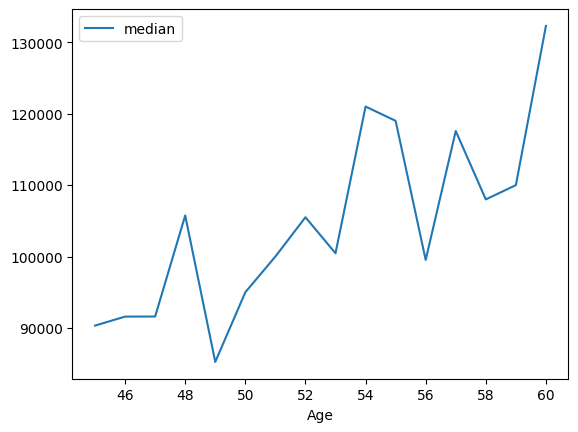

In [17]:
median_convertedcomp_for_age_group_45_60.plot(kind = 'line', y = 'ConvertedComp')

In [ ]:
mainbranch_count = data[['MainBranch']].value_counts()

In [ ]:
mainbranch_count.plot(kind = 'barh')

In [ ]:
pivot_table = pd.pivot_table(data, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

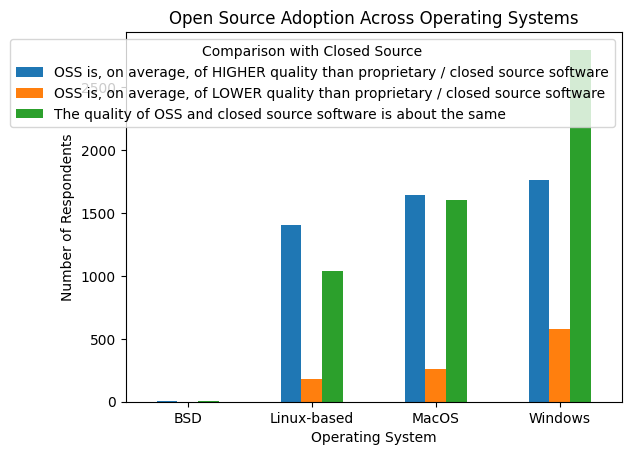

In [10]:
pivot_table = pd.pivot_table(data, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()

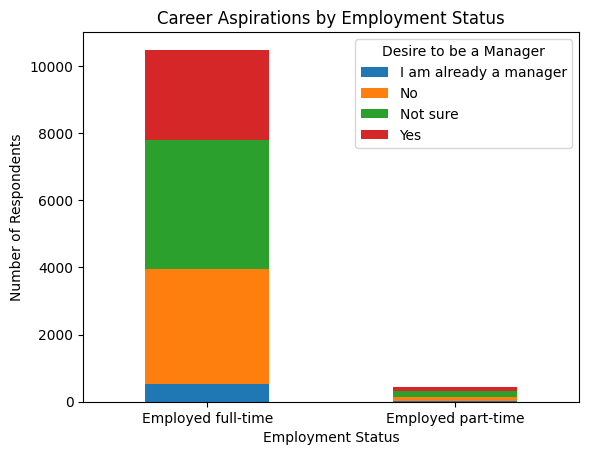

In [13]:
pivot_table = pd.pivot_table(data, index='Employment', columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()

In [14]:
data.to_excel('./data.xlsx', index=False)

In [ ]:
conn.close()